# Data understanding

De gebruikte dataset is “Geregistreerde criminaliteit" (https://opendata.cbs.nl/statline/#/CBS/nl/dataset/83648NED/table?fromstatweb). 

De CBS data is een csv bestand, dit staat voor comma seperated values of door comma gescheide waarden in het nederlands.
De data bevat de volgende kolomen:
 - `ID` is de unieke waarde voor elke row.
 - `Soort misdrijf` geeft aan welke om wat voor misdrijf het gaat.
 - `Perioden` geeft de periode aan waarin de misdrijven en aantal misdrijven zijn uitgevoerd.
 - `Regio's` is de regio waarin de genoemde aantal misdrijven in zijn gebeurd.
 - `Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)` is de aantal misdrijven die binnen een provincie/gemeente geregistreerd zijn.
 - `Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)` is de procentuele aantal van de totaal geregistreerde misdrijven.
 - `Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw. (per 1.000 inwoners)` is de aantal misdrijven die binnen een provincie/gemeente geregistreerd zijn per 1.000 inwoners.

## Beschrijven van de data

Hieronder staat een beschrijving van de data vanuit de Centraal Bureau Statistieken. Dit wordt telkens door middel van een stukje code weergegeven. 

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from prep import movecol

# Dataset inlezen
file = "../../../raw-data/Veiligheid.csv"
data_veiligheid = pd.read_csv(file, sep=";")

df = pd.DataFrame(data_veiligheid)

# Dataverkennen door dataframe te openen
data_veiligheid



,Soort misdrijf,Perioden,Regio's,Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal),"Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)",Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw. (per 1 000 inwoners)
0,"Misdrijven, totaal",2015,Groningen (PV),30065.0,100.0,"51,5"
1,"Misdrijven, totaal",2016,Groningen (PV),29570.0,100.0,"50,7"
2,"Misdrijven, totaal",2017,Groningen (PV),24990.0,100.0,"42,8"
3,"Misdrijven, totaal",2018*,Groningen (PV),24035.0,100.0,"41,2"
4,"Misdrijven, totaal",2019*,Groningen (PV),24865.0,100.0,"42,6"
...,...,...,...,...,...,...
176995,9.2 Misdrijf (overig),2015,Niet-gemeentelijk ingedeeld,10.0,1.0,NaN
176996,9.2 Misdrijf (overig),2016,Niet-gemeentelijk ingedeeld,10.0,1.0,NaN
176997,9.2 Misdrijf (overig),2017,Niet-gemeentelijk ingedeeld,20.0,1.0,NaN
176998,9.2 Misdrijf (overig),2018*,Niet-gemeentelijk ingedeeld,25.0,1.0,NaN


In [2]:
# Info over de kolommen
info_kolommen_veiligheid = data_veiligheid.info()
info_kolommen_veiligheid

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177000 entries, 0 to 176999
Data columns (total 6 columns):
 #   Column                                                                                                  Non-Null Count   Dtype  
---  ------                                                                                                  --------------   -----  
 0   Soort misdrijf                                                                                          177000 non-null  object 
 1   Perioden                                                                                                177000 non-null  object 
 2   Regio's                                                                                                 177000 non-null  object 
 3   Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)                                     148200 non-null  float64
 4   Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal gereg

In [3]:
# Beschrijvende statistieken van de data
beschrijvende_stats_veiligheid = data_veiligheid.describe()
beschrijvende_stats_veiligheid

,Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal),"Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)"
count,148200.000000,148200.000000
mean,219.201113,4.900385
std,2918.560582,14.944102
min,0.000000,0.000000
25%,0.000000,0.000000
50%,5.000000,0.000000
75%,30.000000,2.000000
max,224970.000000,100.000000


In [4]:
# Informatie over de kolomnamen in de Dataframe
data_veiligheid.columns

Index(['Soort misdrijf', 'Perioden', 'Regio's',
       'Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)',
       'Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)',
       'Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw.  (per 1 000 inwoners)'],
      dtype='object')

In [5]:
# Controleren op nulwaarden in de dataframe
data_veiligheid.isna().sum()

Soort misdrijf                                                                                                0
Perioden                                                                                                      0
Regio's                                                                                                       0
Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)                                       28800
Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)    28800
Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw.  (per 1 000 inwoners)                   89035
dtype: int64

## Data exploratie

In [6]:
# Pairplot weergave van de data.
#sb.pairplot(data_veiligheid, kind="reg")

In [7]:
# Catplot weergave van de data.
# sb.barplot(x="Perioden", y="Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)", data=data_veiligheid, color="steelblue", errwidth=0)

In [8]:
# Alle soorten misdrijven die er minimaal 1 keer in voorkomen.
soorten_misdrijven = data_veiligheid["Soort misdrijf"].drop_duplicates()
soorten_misdrijven

0                              Misdrijven, totaal
2360                        1 Vermogensmisdrijven
4720        1.1 Diefstal/verduistering en inbraak
7080         1.1.1 Diefstal en inbraak met geweld
9440      1.1.2 Diefstal en inbraak zonder geweld
                           ...                   
165200                 6.3 Drugsmisdrijf (overig)
167560                    7 (Vuur)wapenmisdrijven
169920                9 Misdrijven overige wetten
172280                      9.1 Militair misdrijf
174640                      9.2 Misdrijf (overig)
Name: Soort misdrijf, Length: 75, dtype: object

## Data Preperation

In [9]:
# Kolomnamen van de dataset wijzigen.

data_veiligheid_nieuw = data_veiligheid

data_veiligheid_nieuw.rename(columns={'Soort misdrijf':'Soort_misdrijf','Geregistreerde misdrijven/Totaal geregistreerde misdrijven (aantal)':'Aantal_misdrijven', 'Geregistreerde misdrijven/Geregistreerde misdrijven, relatief (% van totaal geregistreerde misdrijven)':'Misdrijven_relatief(%)', 'Geregistreerde misdrijven/Geregistreerde misdrijven per 1000 inw.  (per 1 000 inwoners)':'Aantal_misdrijven(per_1000_inw)'}, inplace=True)

data_veiligheid_nieuw

,Soort_misdrijf,Perioden,Regio's,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven(per_1000_inw)
0,"Misdrijven, totaal",2015,Groningen (PV),30065.0,100.0,"51,5"
1,"Misdrijven, totaal",2016,Groningen (PV),29570.0,100.0,"50,7"
2,"Misdrijven, totaal",2017,Groningen (PV),24990.0,100.0,"42,8"
3,"Misdrijven, totaal",2018*,Groningen (PV),24035.0,100.0,"41,2"
4,"Misdrijven, totaal",2019*,Groningen (PV),24865.0,100.0,"42,6"
...,...,...,...,...,...,...
176995,9.2 Misdrijf (overig),2015,Niet-gemeentelijk ingedeeld,10.0,1.0,NaN
176996,9.2 Misdrijf (overig),2016,Niet-gemeentelijk ingedeeld,10.0,1.0,NaN
176997,9.2 Misdrijf (overig),2017,Niet-gemeentelijk ingedeeld,20.0,1.0,NaN
176998,9.2 Misdrijf (overig),2018*,Niet-gemeentelijk ingedeeld,25.0,1.0,NaN


In [10]:
# Controleren op nulwaarden in de dataframe
data_veiligheid_nieuw.isna().sum()

Soort_misdrijf                         0
Perioden                               0
Regio's                                0
Aantal_misdrijven                  28800
Misdrijven_relatief(%)             28800
Aantal_misdrijven(per_1000_inw)    89035
dtype: int64

In [11]:
data_veiligheid_nieuw.loc[data_veiligheid_nieuw['Aantal_misdrijven'] == 0]

,Soort_misdrijf,Perioden,Regio's,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven(per_1000_inw)
7142,1.1.1 Diefstal en inbraak met geweld,2017,Niet in te delen (PV),0.0,0.0,0
7145,1.1.1 Diefstal en inbraak met geweld,2015,Aa en Hunze,0.0,0.0,0
7147,1.1.1 Diefstal en inbraak met geweld,2017,Aa en Hunze,0.0,0.0,0
7148,1.1.1 Diefstal en inbraak met geweld,2018*,Aa en Hunze,0.0,0.0,0
7149,1.1.1 Diefstal en inbraak met geweld,2019*,Aa en Hunze,0.0,0.0,0
...,...,...,...,...,...,...
176962,9.2 Misdrijf (overig),2017,Zuidhorn,0.0,0.0,0
176969,9.2 Misdrijf (overig),2019*,Zuidplas,0.0,0.0,0
176980,9.2 Misdrijf (overig),2015,Zwartewaterland,0.0,0.0,0
176981,9.2 Misdrijf (overig),2016,Zwartewaterland,0.0,0.0,0


In [12]:
#nieuwe dataset inladen voor mergen dataset, zodat regio's ook provincie er achter heeft staan.

file = "../../../raw-data/gemeenten-provincie.xlsx"
postcode = pd.read_excel(file) 

#dataframe maken van de dataset
df2 = pd.DataFrame(postcode)

#colom hernoemen
postcode.rename(columns={"Gemeente":"Regio's"}, inplace=True)

#dataframe opnieuw defineren
df2 = pd.DataFrame(postcode)

#mergen van 2 dataset op basis van regio's colomn
data_veiligheid_incl_provincie = data_veiligheid_nieuw.merge(df2, on="Regio's")

data_veiligheid_incl_provincie

,Soort_misdrijf,Perioden,Regio's,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven(per_1000_inw),Provincie
0,"Misdrijven, totaal",2015,Aa en Hunze,645.0,100.0,"25,6",Drenthe
1,"Misdrijven, totaal",2016,Aa en Hunze,620.0,100.0,"24,6",Drenthe
2,"Misdrijven, totaal",2017,Aa en Hunze,550.0,100.0,"21,7",Drenthe
3,"Misdrijven, totaal",2018*,Aa en Hunze,545.0,100.0,"21,4",Drenthe
4,"Misdrijven, totaal",2019*,Aa en Hunze,665.0,100.0,"26,3",Drenthe
...,...,...,...,...,...,...,...
172120,9.2 Misdrijf (overig),2015,Niet-gemeentelijk ingedeeld,10.0,1.0,NaN,Overig
172121,9.2 Misdrijf (overig),2016,Niet-gemeentelijk ingedeeld,10.0,1.0,NaN,Overig
172122,9.2 Misdrijf (overig),2017,Niet-gemeentelijk ingedeeld,20.0,1.0,NaN,Overig
172123,9.2 Misdrijf (overig),2018*,Niet-gemeentelijk ingedeeld,25.0,1.0,NaN,Overig


In [13]:
data_veiligheid_incl_provincie = movecol(data_veiligheid_incl_provincie, cols_to_move=['Provincie'], ref_col="Regio's", place='After')

data_veiligheid_incl_provincie

,Soort_misdrijf,Perioden,Regio's,Provincie,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven(per_1000_inw)
0,"Misdrijven, totaal",2015,Aa en Hunze,Drenthe,645.0,100.0,"25,6"
1,"Misdrijven, totaal",2016,Aa en Hunze,Drenthe,620.0,100.0,"24,6"
2,"Misdrijven, totaal",2017,Aa en Hunze,Drenthe,550.0,100.0,"21,7"
3,"Misdrijven, totaal",2018*,Aa en Hunze,Drenthe,545.0,100.0,"21,4"
4,"Misdrijven, totaal",2019*,Aa en Hunze,Drenthe,665.0,100.0,"26,3"
...,...,...,...,...,...,...,...
172120,9.2 Misdrijf (overig),2015,Niet-gemeentelijk ingedeeld,Overig,10.0,1.0,NaN
172121,9.2 Misdrijf (overig),2016,Niet-gemeentelijk ingedeeld,Overig,10.0,1.0,NaN
172122,9.2 Misdrijf (overig),2017,Niet-gemeentelijk ingedeeld,Overig,20.0,1.0,NaN
172123,9.2 Misdrijf (overig),2018*,Niet-gemeentelijk ingedeeld,Overig,25.0,1.0,NaN


In [14]:
# Alle Gemeentelijke records groeperen in de bijbehorende Provincie

provincies = sorted(data_veiligheid_incl_provincie["Provincie"].drop_duplicates())

provincies

['Drenthe',
 'Flevoland',
 'Friesland',
 'Gelderland',
 'Groningen',
 'Limburg',
 'Noord-Brabant',
 'Noord-Holland',
 'Overig',
 'Overijssel',
 'Utrecht',
 'Zeeland',
 'Zuid-Holland']

In [15]:
# TOTAAL AANTAL MISDRIJVEN PER JAAR PER PROVINCIE. RELATIEVE KOLOM IS NIET VAN TOEPASSING AANGEZIEN TOTALEN GEBASEERD IS OP 100%.
pd.set_option('display.max_rows', 1000)

data_voorspelling_totaal = data_veiligheid_incl_provincie.loc[((data_veiligheid_incl_provincie.Soort_misdrijf == 'Misdrijven, totaal'))]

totaal_provincie_perjaar = data_voorspelling_totaal.groupby(['Provincie', 'Perioden']).sum()

totaal_misdrijven_pv_jaar = totaal_provincie_perjaar.drop(columns=['Misdrijven_relatief(%)'])

totaal_misdrijven_pv_jaar


Aantal_misdrijven
Provincie     Perioden                   
Drenthe       2015                20090.0
              2016                18665.0
              2017                16470.0
              2018*               15670.0
              2019*               17070.0
Flevoland     2015                21550.0
              2016                20825.0
              2017                18685.0
              2018*               18190.0
              2019*               19170.0
Friesland     2015                26585.0
              2016                24600.0
              2017                21135.0
              2018*               21990.0
              2019*               22075.0
Gelderland    2015                95205.0
              2016                92785.0
              2017                81715.0
              2018*               76855.0
              2019*               82115.0
Groningen     2015                30065.0
              2016                29570.0
              2017                25000.0
              2018*               24035.0
              2019*               24875.0
Limburg       2015                68990.0
              2016                63015.0
              2017                56575.0
              2018*               52315.0
              2019*               54055.0
Noord-Brabant 2015               145570.0
              2016               135210.0
              2017               118800.0
              2018*              112580.0
              2019*              119030.0
Noord-Holland 2015               202680.0
              2016               189705.0
              2017               171765.0
              2018*              162985.0
              2019*              166310.0
Overig        2015                 1665.0
              2016                 1135.0
              2017                 1640.0
              2018*                1755.0
              2019*                1875.0
Overijssel    2015                50585.0
              2016                48575.0
              2017                43460.0
              2018*               42275.0
              2019*               42755.0
Utrecht       2015                74175.0
              2016                72070.0
              2017                66560.0
              2018*               63440.0
              2019*               65190.0
Zeeland       2015                16830.0
              2016                15560.0
              2017                13535.0
              2018*               12720.0
              2019*               13415.0
Zuid-Holland  2015               224965.0
              2016               218570.0
              2017               197610.0
              2018*              181485.0
              2019*              189490.0

In [16]:
data_voorspelling_groupby = data_voorspelling_totaal.groupby(['Perioden', "Regio's"]).sum()
np.set_printoptions(threshold=np.inf)

min_max_scaler = preprocessing.MinMaxScaler()

aantal_misdrijven_minmax = min_max_scaler.fit_transform(data_voorspelling_totaal[["Aantal_misdrijven"]])
data_voorspelling_groupby["Aantal_misdrijven_genormaliseerd"] = aantal_misdrijven_minmax

data_voorspelling_groupby

Aantal_misdrijven  Misdrijven_relatief(%)  \
Perioden Regio's                                                               
2015     's-Gravenhage (gemeente)            45920.0                   100.0   
         's-Hertogenbosch                    11485.0                   100.0   
         Aa en Hunze                           645.0                   100.0   
         Aalburg                               385.0                   100.0   
         Aalsmeer                             1100.0                   100.0   
...                                              ...                     ...   
2019*    Zutphen                              2630.0                   100.0   
         Zwartewaterland                       480.0                   100.0   
         Zwijndrecht                          1740.0                   100.0   
         Zwolle                               6440.0                   100.0   
         het Bildt                               0.0                     0.0   

                                   Aantal_misdrijven_genormaliseerd  
Perioden Regio's                                                     
2015     's-Gravenhage (gemeente)                          0.006396  
         's-Hertogenbosch                                  0.006136  
         Aa en Hunze                                       0.005408  
         Aalburg                                           0.005356  
         Aalsmeer                                          0.006604  
...                                                             ...  
2019*    Zutphen                                           0.017004  
         Zwartewaterland                                   0.011492  
         Zwijndrecht                                       0.016744  
         Zwolle                                            0.017940  
         het Bildt                                         0.019188  

[2295 rows x 3 columns]

In [17]:
data_voorspelling_groupby.describe()

,Aantal_misdrijven,Misdrijven_relatief(%),Aantal_misdrijven_genormaliseerd
count,2295.000000,2295.000000,1911.000000
mean,1893.642702,83.267974,0.023339
std,5718.959442,37.334291,0.064459
min,0.000000,0.000000,0.000000
25%,325.000000,100.000000,0.005356
50%,755.000000,100.000000,0.009048
75%,1502.500000,100.000000,0.017680
max,96185.000000,100.000000,1.000000


In [18]:
m1 = data_voorspelling_groupby['Aantal_misdrijven_genormaliseerd'] < 0.005357
m2 = data_voorspelling_groupby['Aantal_misdrijven_genormaliseerd'] > 0.017679

data_voorspelling_groupby['Aantal_misdrijven_geklasseerd'] = np.select([m1,m2], ['Laag','Hoog'], default='Middel')

data_voorspelling_groupby

Aantal_misdrijven  Misdrijven_relatief(%)  \
Perioden Regio's                                                               
2015     's-Gravenhage (gemeente)            45920.0                   100.0   
         's-Hertogenbosch                    11485.0                   100.0   
         Aa en Hunze                           645.0                   100.0   
         Aalburg                               385.0                   100.0   
         Aalsmeer                             1100.0                   100.0   
...                                              ...                     ...   
2019*    Zutphen                              2630.0                   100.0   
         Zwartewaterland                       480.0                   100.0   
         Zwijndrecht                          1740.0                   100.0   
         Zwolle                               6440.0                   100.0   
         het Bildt                               0.0                     0.0   

                                   Aantal_misdrijven_genormaliseerd  \
Perioden Regio's                                                      
2015     's-Gravenhage (gemeente)                          0.006396   
         's-Hertogenbosch                                  0.006136   
         Aa en Hunze                                       0.005408   
         Aalburg                                           0.005356   
         Aalsmeer                                          0.006604   
...                                                             ...   
2019*    Zutphen                                           0.017004   
         Zwartewaterland                                   0.011492   
         Zwijndrecht                                       0.016744   
         Zwolle                                            0.017940   
         het Bildt                                         0.019188   

                                  Aantal_misdrijven_geklasseerd  
Perioden Regio's                                                 
2015     's-Gravenhage (gemeente)                        Middel  
         's-Hertogenbosch                                Middel  
         Aa en Hunze                                     Middel  
         Aalburg                                           Laag  
         Aalsmeer                                        Middel  
...                                                         ...  
2019*    Zutphen                                         Middel  
         Zwartewaterland                                 Middel  
         Zwijndrecht                                     Middel  
         Zwolle                                            Hoog  
         het Bildt                                         Hoog  

[2295 rows x 4 columns]

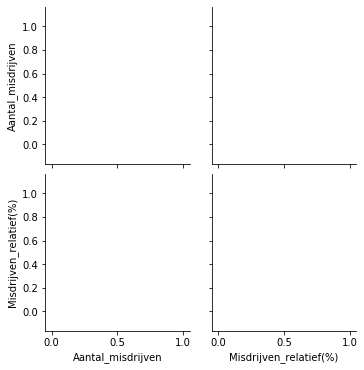

In [19]:
#PER PERIODE/JAAR EEN OVERZICHT VAN ALLE SOORTEN MISDRIJVEN EN WAT HET RELATIEF IS VAN HET TOTAAL. REGIO IS GEKOZEN DOOR INPUT
pd.set_option('display.max_rows', 1000)

gemeente = input('Voer hier een gemeente in')

soortmisdrijf_regio_perjaar = data_veiligheid_incl_provincie.loc[((data_veiligheid_incl_provincie["Regio's"] == gemeente))]

sb.pairplot(soortmisdrijf_regio_perjaar.groupby(["Perioden", "Soort_misdrijf"]).sum(), kind="reg")

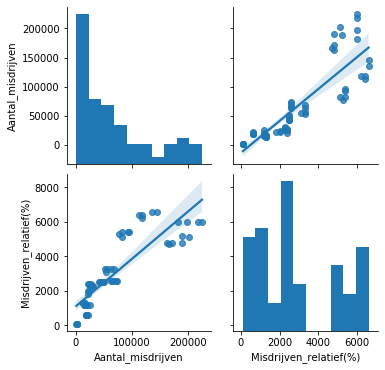

In [20]:
sb.pairplot(totaal_provincie_perjaar, kind="reg")

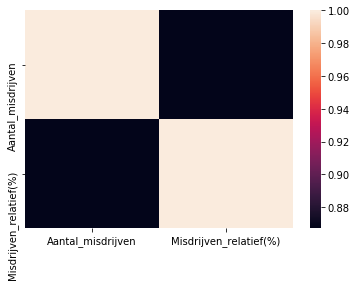

In [21]:
sb.heatmap(totaal_provincie_perjaar.corr())

In [22]:
# Alle Overige records groeperen op Overig
